In [86]:
# import all required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [252]:
# read csv file
df=pd.read_csv("C:\\Users\\anjal\\Downloads\\Oasis infobyte data files\\retail_sales_dataset.csv",parse_dates=['Date'])
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [254]:
# show top 5 rows of all columns
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
# describe the statistical function of numercial columns
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [88]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
 9   month             1000 non-null   period[M]     
dtypes: datetime64[ns](1), int64(5), object(3), period[M](1)
memory usage: 78.3+ KB


In [90]:
# method to count null values of every column
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
month               0
dtype: int64

In [92]:
# Drop duplicate rows
df = df.drop_duplicates()

In [96]:
# calculate mean
mean_value = df['Total Amount'].mean()
print("Mean:", mean_value)

Mean: 456.0


In [72]:
# calculate median
median_value=df['Total Amount'].median()
print("Median:",median_value)

Median: 135.0


In [74]:
# calculate mode
mode_value = df['Total Amount'].mode()
print("mode:", mode_value[0])

mode: 50


In [76]:
# calculate standard deviation
standard_deviation = df['Total Amount'].std()
print("standard deviation:", standard_deviation)

standard deviation: 559.997631555123


In [78]:
# calculate variance
variance = df['Total Amount'].var()
print("variance:", variance)

variance: 313597.34734734736


In [294]:
# transfrom date to month
df['month'] = df['Date'].dt.to_period('M')

In [296]:
# group by month and total amount
monthly_sales = df.groupby('month')['Total Amount'].sum()

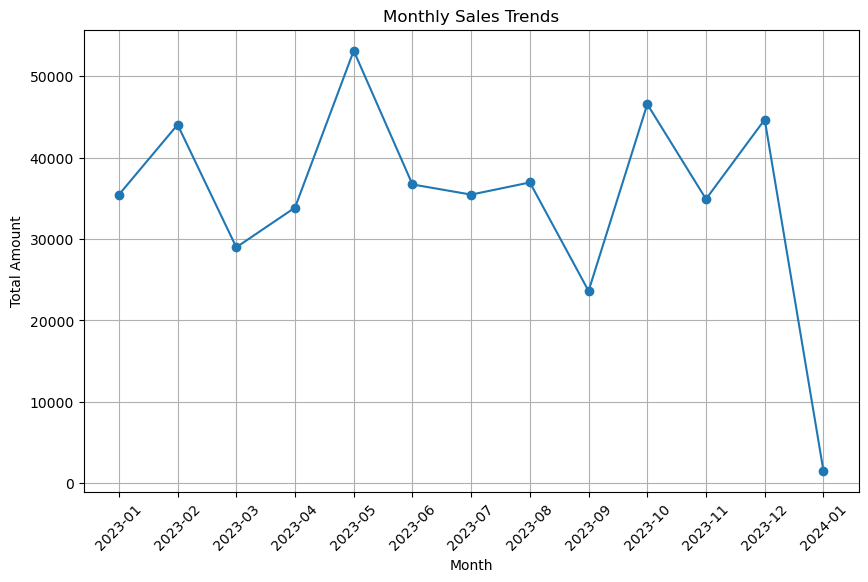

In [298]:
# time series analysis 
# find monthly sales on total amount
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# conclusion: The march month of 2023 (2023-05) have highest total amount

<Axes: xlabel='Product Category', ylabel='Total Amount'>

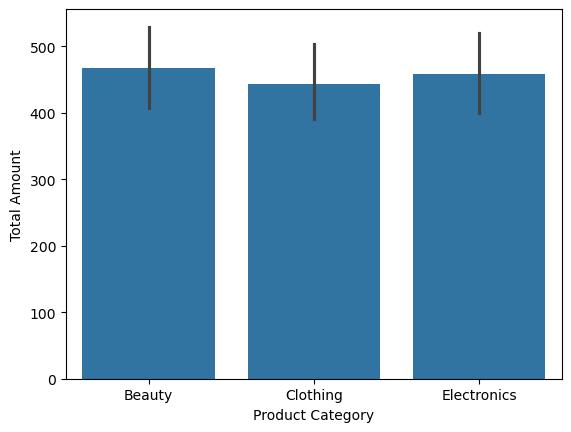

In [19]:
# create barplot of product category and total amount
sns.barplot(x='Product Category',y='Total Amount',data=df)

# conclusion: the beauty product category have highest total amount

<Axes: xlabel='Product Category', ylabel='Total Amount'>

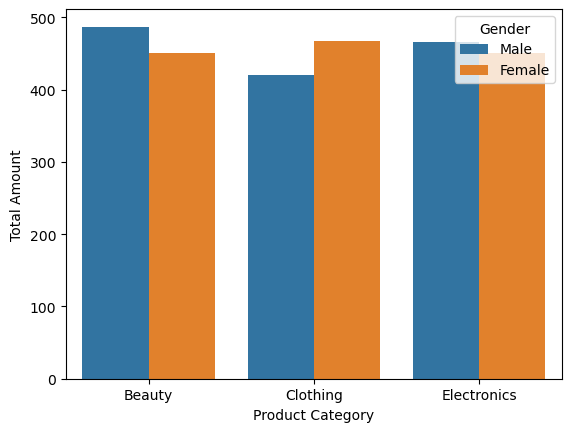

In [22]:
# create barplot of product category and total amount on the basis of gender
sns.barplot(x='Product Category',y='Total Amount',hue="Gender",data=df,errorbar=None)

# conclusion: The highest total amount is spend by male in beauty product category and female spend highest total amount in clothing product category

In [306]:
age_range_by_gender = df.groupby('Gender')['Age'].agg(['min', 'max'])
print(age_range_by_gender)

        min  max
Gender          
Female   18   64
Male     18   64


In [312]:
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
Female    510
Male      490
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='Age'>

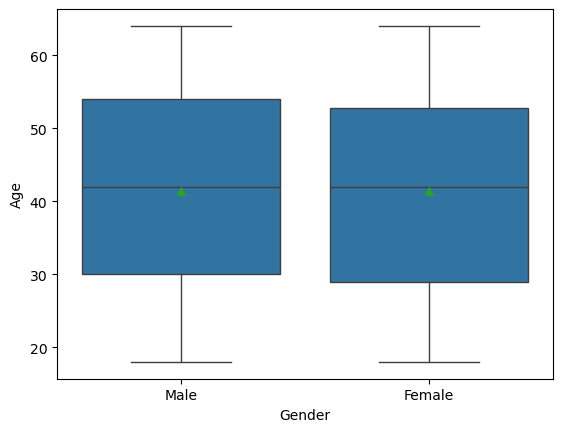

In [310]:
# create boxplot on the basis of age and gender
sns.boxplot(x='Gender',y="Age" ,data=df,showmeans=True)

<Axes: xlabel='Product Category', ylabel='Age'>

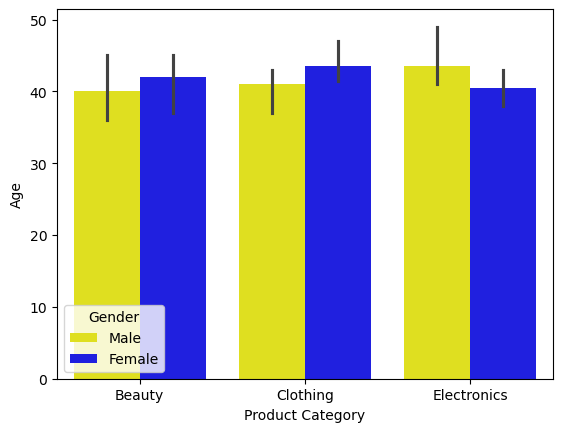

In [316]:
# create barplot on the basis of product category age and hue is gender
sns.barplot(x='Product Category',y='Age',hue='Gender',data=df,palette=['yellow','blue'],estimator=np.median)

# conclusion: Most of the females the age between 40 to 50 are spending on clothing product category

<Axes: xlabel='Total Amount', ylabel='Count'>

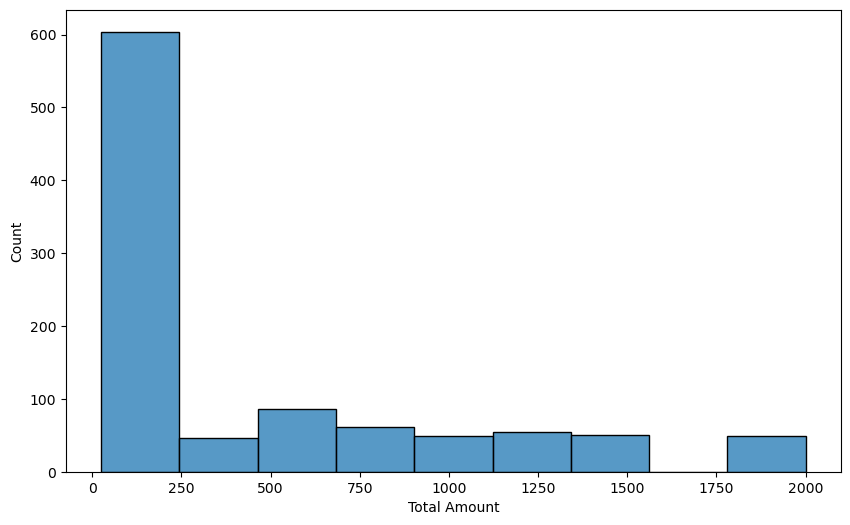

In [203]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df,x='Total Amount',binwidth=220)

# conclusion: 600 people spending Total amount of 5 to 250

In [290]:
customer = df.groupby(['Customer ID','Gender','Age','Product Category','Date'])['Total Amount'].max()
print(f"The Customer ID with the highest total spending is: {customer.idxmax()}")
print(f"Total Amount spent: {customer.max()}")

The Customer ID with the highest total spending is: ('CUST015', 'Female', 42, 'Electronics', Timestamp('2023-01-16 00:00:00'))
Total Amount spent: 2000


# Final conclusion: The customer with customer ID CUST015 Gender is Female age is 42 Spending Highest Total amount 2000 on electronics product on 16 january 2023